In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv("/content/sample_data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0.5, 0, 'Salary')

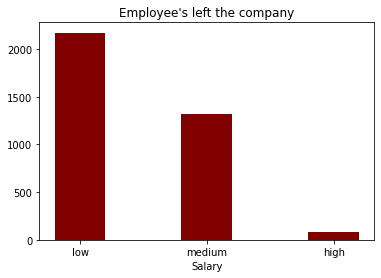

In [ ]:
data={'low':(df[(df['salary']=='low')].left==1).sum(),
      'medium':(df[(df['salary']=='medium')].left==1).sum(),
      'high':(df[(df['salary']=='high')].left==1).sum()}

salary = list(data.keys())
values = list(data.values())
  
 
plt.bar(salary, values, color ='maroon',
        width = 0.4)

plt.title("Employee's left the company")
plt.xlabel("Salary")

Text(0.5, 0, 'Salary')

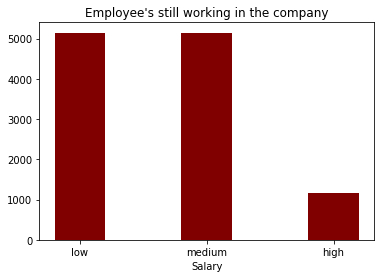

In [ ]:
data2={'low':(df[(df['salary']=='low')].left==0).sum(),
      'medium':(df[(df['salary']=='medium')].left==0).sum(),
      'high':(df[(df['salary']=='high')].left==0).sum()}

salary = list(data2.keys())
values = list(data2.values())
  
 
plt.bar(salary, values, color ='maroon',
        width = 0.4)

plt.title("Employee's still working in the company")
plt.xlabel("Salary")

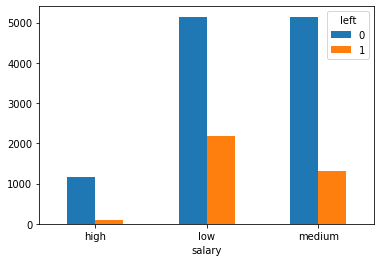

In [ ]:
crosstb = pd.crosstab( df.salary,df.left)
crosstb.plot.bar(rot=0)

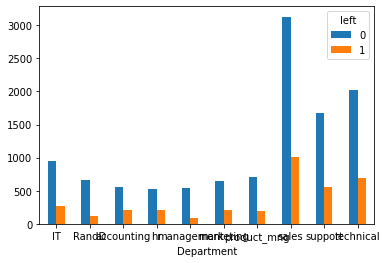

In [ ]:
crosstb = pd.crosstab( df.Department,df.left)
crosstb.plot.bar(rot=0)

In [ ]:
df_dummies=pd.get_dummies(df['salary'])
df_dummies
df_dummies2=pd.get_dummies(df['Department'])
df_dummies2

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [ ]:
all_val=pd.concat([df,df_dummies],axis=1)
all_val

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [ ]:
x=all_val.drop(columns=['last_evaluation','number_project','left','Work_accident','salary','Department','time_spend_company','medium'])
y=all_val['left']
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [ ]:
clasi_model=linear_model.LogisticRegression()
clasi_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
clasi_model.score(x_test,y_test)

0.779